In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA

path = '../Utils/CC.xlsx'

df = pd.read_excel(path)
display(df.head())

,Instalacion,Fecha de Creacion,Codigo de actividad de historial,Historial de actividad,Estado,Codigo de motivo,Codigo de bloqueo,Ubicacion,Numero de LPN,Codigo de articulo,Descripcion de articulo,Cantidad original,Cantidad,Cantidad ajustada,Fecha modificacion,Crear usuario
0,FAT,2024-10-18 13:41:01,38,38 - Conteo ciclico de ubicacion activa finali...,No preparado,Conteo Ciclico,NaN,F-06-43-02,NaN,NaN,NaN,0,0,0,2024-10-18 13:41:01,mbaltazarmx
1,FAT,2024-10-18 13:41:01,41,41 - Conteo ciclico - Conteo de LPN de entrada,No preparado,Conteo Ciclico,NaN,F-06-43-02,1.010500e+14,515123.0,Chips Sal 1p 62g CP FLOW BAR,49,49,0,2024-10-18 13:41:01,mbaltazarmx
2,FAT,2024-10-18 13:41:01,41,41 - Conteo ciclico - Conteo de LPN de entrada,No preparado,Conteo Ciclico,NaN,F-06-43-02,1.010500e+14,515123.0,Chips Sal 1p 62g CP FLOW BAR,49,49,0,2024-10-18 13:41:01,mbaltazarmx
3,FAT,2024-10-18 13:41:01,41,41 - Conteo ciclico - Conteo de LPN de entrada,No preparado,Conteo Ciclico,NaN,F-06-43-02,1.010500e+14,515123.0,Chips Sal 1p 62g CP FLOW BAR,49,49,0,2024-10-18 13:41:01,mbaltazarmx
4,FAT,2024-10-18 13:41:01,41,41 - Conteo ciclico - Conteo de LPN de entrada,No preparado,Conteo Ciclico,NaN,F-06-43-02,1.010500e+14,515123.0,Chips Sal 1p 62g CP FLOW BAR,49,49,0,2024-10-18 13:41:01,mbaltazarmx


In [11]:
def plot_column(df, column_name, product_name, color):

      num_predictions = 2

      dates = pd.to_datetime(df['Fecha de Creacion'])
      cantidades = df['Cantidad'].values

      model = ARIMA(cantidades, order=(1,1,1))
      model_fit = model.fit()
      predictions = model_fit.predict(start=len(cantidades), end=len(cantidades) + num_predictions -1)
      future_dates = pd.date_range(start=dates.iloc[-1], periods=num_predictions + 1, freq='D')[1:]

      plt.figure(figsize=(10, 6))
      plt.plot(dates, df[column_name], marker='o', color=color, label='Cantidad')
      plt.plot(future_dates, predictions, marker='o', color='red', label='Predicciones')
      plt.xlabel('Fecha')
      plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
      plt.title(f'Serie de tiempo de {column_name} de {product_name}')
      plt.grid(True)
      plt.ylabel('Cantidad')
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.legend()
      for x, y in zip(dates, df[column_name]):
        plt.text(x, y+0.2, str(y), ha='center', va='bottom')
      for x, y in zip(future_dates, predictions):
        plt.text(x, y+0.2, str(f"{np.round(y)}"), ha='center', va='bottom')
      plt.show()

def plot_timeseries(df, product):
  filtered_df = df[(df['Descripcion de articulo'] == product)]

  if filtered_df.empty:
    print(f"No data found for product '{product}'.")
    return

  filtered_df = filtered_df.sort_values('Fecha de Creacion')

  plot_column(filtered_df, 'Cantidad', product, 'blue')

Producto seleccionado: Chips Papatinas Chillix PC 1p 31g FLOW BAR


/opt/anaconda3/envs/ProyectoBimbo/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


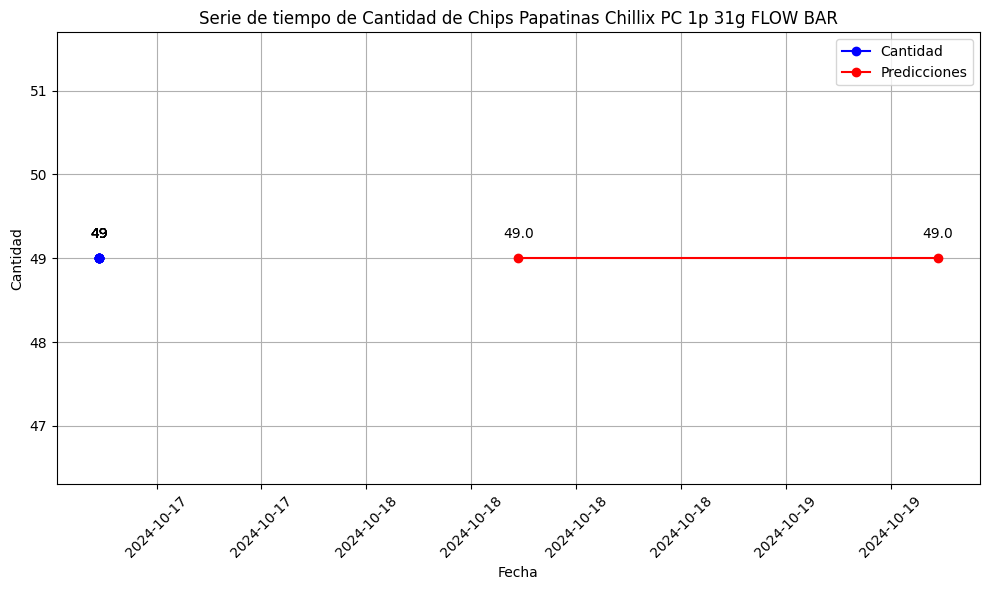

: 

In [12]:
import random

products = df['Descripcion de articulo'].unique()
random_product = random.choice(products)

print(f"Producto seleccionado: {random_product}")
plot_timeseries(df, random_product)

In [ ]:
import sys
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QPushButton
from PyQt5.QtCore import QDateTime
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from statsmodels.tsa.arima.model import ARIMA

class PlotCanvas(FigureCanvas):
    def __init__(self, parent=None):
        fig, self.ax = plt.subplots(figsize=(10, 6))
        super().__init__(fig)
        self.setParent(parent)

    def plot(self, df, column_name, product_name, color):
        num_predictions = 2
        dates = pd.to_datetime(df['Fecha de Creacion'])
        cantidades = df['Cantidad'].values

        model = ARIMA(cantidades, order=(1, 1, 1))
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(cantidades), end=len(cantidades) + num_predictions - 1)
        future_dates = pd.date_range(start=dates.iloc[-1], periods=num_predictions + 1, freq='D')[1:]

        self.ax.clear()
        self.ax.plot(dates, df[column_name], marker='o', color=color, label='Cantidad')
        self.ax.plot(future_dates, predictions, marker='o', color='red', label='Predicciones')
        self.ax.set_xlabel('Fecha')
        self.ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        self.ax.set_title(f'Serie de tiempo de {column_name} de {product_name}')
        self.ax.grid(True)
        self.ax.set_ylabel('Cantidad')
        self.ax.tick_params(axis='x', rotation=45)
        self.ax.legend()
        for x, y in zip(dates, df[column_name]):
            self.ax.text(x, y + 0.2, str(y), ha='center', va='bottom')
        for x, y in zip(future_dates, predictions):
            self.ax.text(x, y + 0.2, str(f"{np.round(y)}"), ha='center', va='bottom')
        self.draw()

class BimbotGraphics(QWidget):
    def __init__(self, df):
        super().__init__()
        self.df = df
        self.initUI()


    def initUI(self):
        self.setWindowTitle('Bimbot Analytics')
        self.setGeometry(100, 100, 800, 600)

        layout = QVBoxLayout()

        self.canvas = PlotCanvas(self)

        self.products = self.df['Descripcion de articulo'].unique()

        self.button = QPushButton('Seleccionar Producto Aleatorio', self)
        self.button.clicked.connect(self.update_plot)
        layout.addWidget(self.button)

        self.setLayout(layout)

        with open('../Utils/style.css', 'r') as f:
            self.setStyleSheet(f.read())


    def update_plot(self):
        random_product = random.choice(self.products)
        print(f"Producto seleccionado: {random_product}")
        self.plot_timeseries(self.df, random_product)

    def plot_timeseries(self, df, product):
        filtered_df = df[df['Descripcion de articulo'] == product]
        if filtered_df.empty:
            print(f"No data found for product '{product}'.")
            return
        filtered_df = filtered_df.sort_values('Fecha de Creacion')
        self.canvas.plot(filtered_df, 'Cantidad', product, 'blue')


def run_app():
    app = QApplication(sys.argv)
    path = '../Utils/CC.xlsx'
    df = pd.read_excel(path)
    ex = BimbotGraphics(df)
    ex.show()
    app.exec()


if __name__ == '__main__':
    run_app()


Producto seleccionado: Takis Fuego PC 1p 240g FLOW BAR


/opt/anaconda3/envs/ProyectoBimbo/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
